# Data Preparation

## Cleaning

In [1]:
import pandas as pd
from itertools import chain
from sklearn.preprocessing import MultiLabelBinarizer

df = pd.read_csv('./Data.csv', dtype=str).sort_values(by=['Date'])
print(df.head())

concat_df = df['Winning Number 1'] + ',' + df['2'] + ',' + df['3'] + ',' + df['4'] + ',' + df['5'] + ',' + df['6'] + ',' + df['Extra Number ']
concat_df = concat_df.apply(lambda x: set(x.split(',')))
print(concat_df.head())

mlb = MultiLabelBinarizer()
mlb.set_params(classes=[str(x) for x in range(1,50)])
encoded = mlb.fit_transform(concat_df)
print(mlb.classes_)
print(encoded[:5])

        Draw        Date Winning Number 1   2   3   4   5   6 Extra Number   \
1821  08/001  2008-01-03                5   8  36  39  42  46            14   
1820  08/002  2008-01-05                3  11  14  32  33  42            15   
1819  08/003  2008-01-08                2   9  14  24  40  45             3   
1818  08/004  2008-01-10                4  20  36  42  46  47            22   
1817  08/005  2008-01-13                8  13  18  22  26  42            43   

     From Last  ... Division 3 Prize Division 4 Winners Division 4 Prize  \
1821       NaN  ...            51055             208.00             4800   
1820        42  ...            35315             237.00             4800   
1819        14  ...            40270             241.00             4800   
1818       NaN  ...            58680             155.00             4800   
1817        42  ...            26425             277.00             4800   

     Division 5 Winners Division 5 Prize Division 6 Winners Division

## Visualization

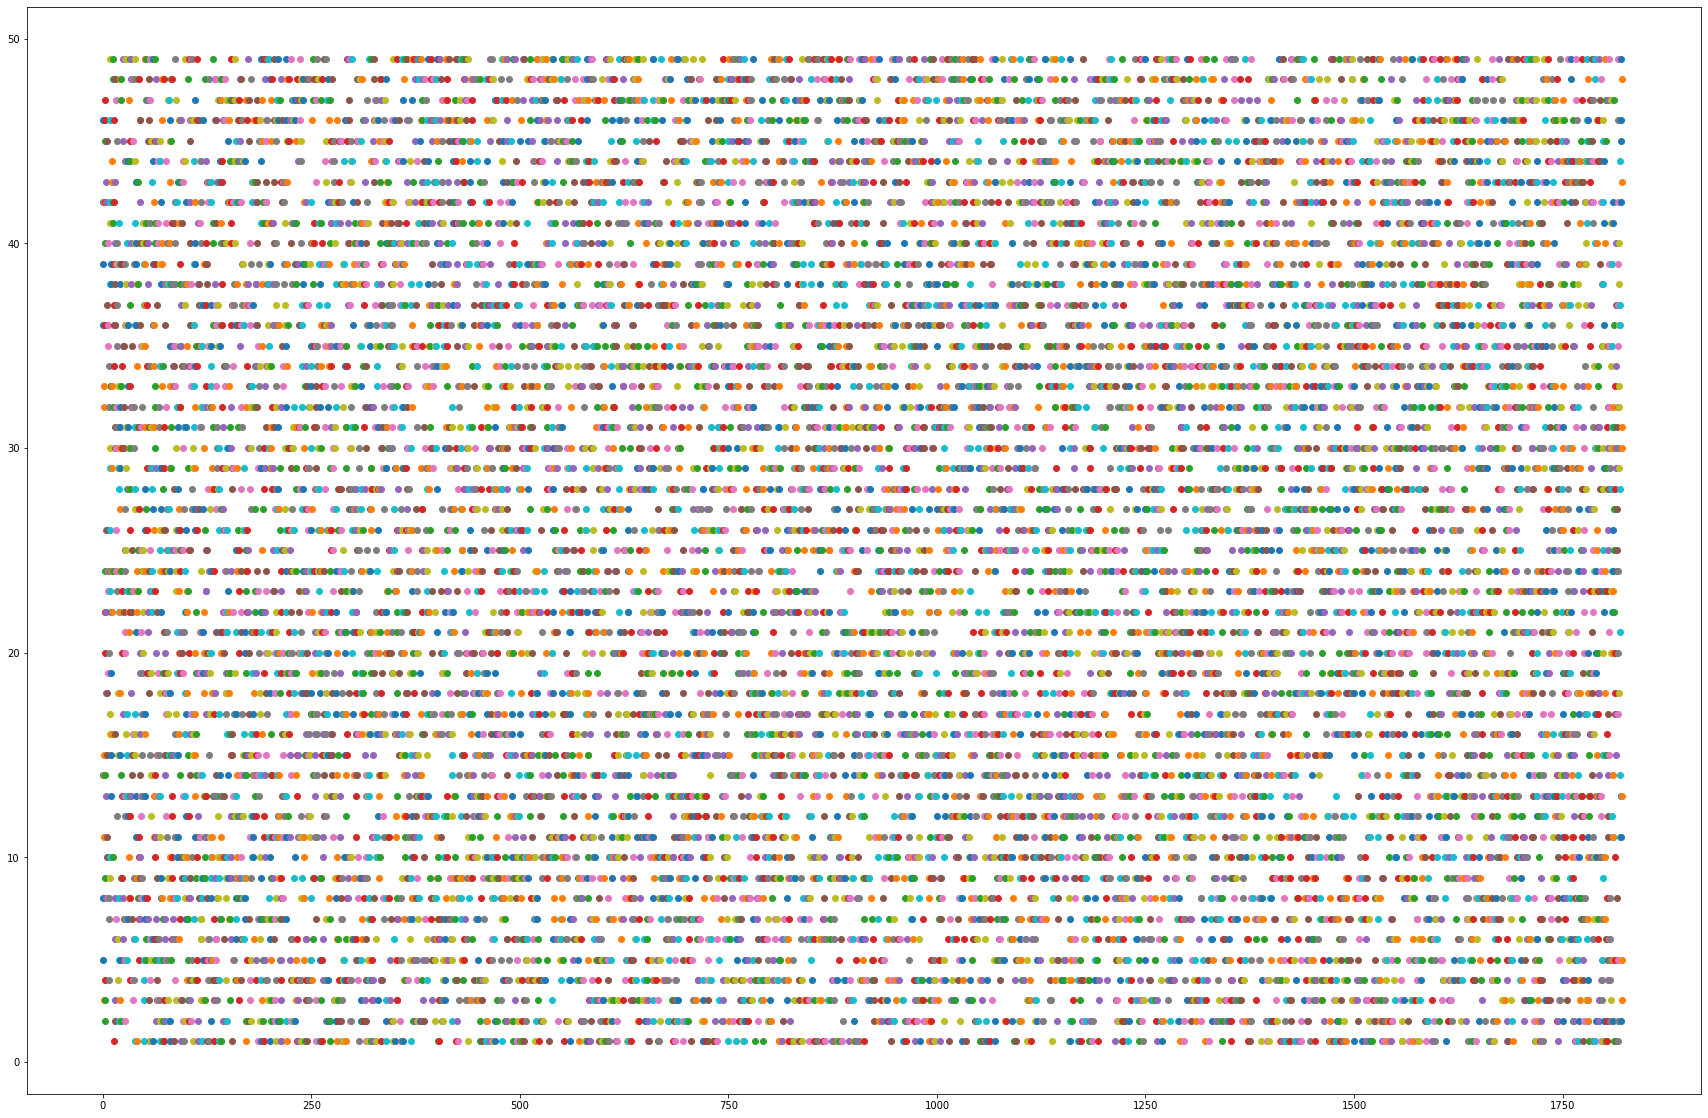

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
for xe, ye in zip(range(0, len(concat_df)), concat_df.apply(list)):
    plt.scatter([xe] * len(ye), [int(y) for y in ye])
plt.show()

## Export

In [2]:
import numpy as np

np.savez_compressed('./data.npz', encoded=encoded)
load = np.load('./data.npz')
print(np.array_equal(encoded, load['encoded']))

True
